In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-bill-prediction/electricity_bill.csv


In [38]:
df = pd.read_csv("/kaggle/input/electricity-bill-prediction/electricity_bill.csv")
df

,Units_Consumed,Electricity_Bill
0,152,1010.93
1,485,3861.19
2,398,3210.64
3,320,2678.67
4,156,1239.04
...,...,...
495,199,1640.91
496,363,2577.80
497,107,1047.46
498,391,2989.52


The data is generated by AI and contains some random noise to mimic real world data. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Units_Consumed    500 non-null    int64  
 1   Electricity_Bill  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [40]:
df.isnull().sum()

Units_Consumed      0
Electricity_Bill    0
dtype: int64

In [41]:
df.describe()

,Units_Consumed,Electricity_Bill
count,500.000000,500.000000
mean,278.468000,2237.826760
std,126.941835,1037.817674
min,51.000000,89.180000
25%,177.000000,1366.145000
50%,277.500000,2251.090000
75%,391.000000,3053.442500
max,500.000000,4466.780000


In [42]:
df.duplicated().sum()

0

In [43]:
df.corr()

,Units_Consumed,Electricity_Bill
Units_Consumed,1.000000,0.968616
Electricity_Bill,0.968616,1.000000


<Axes: >

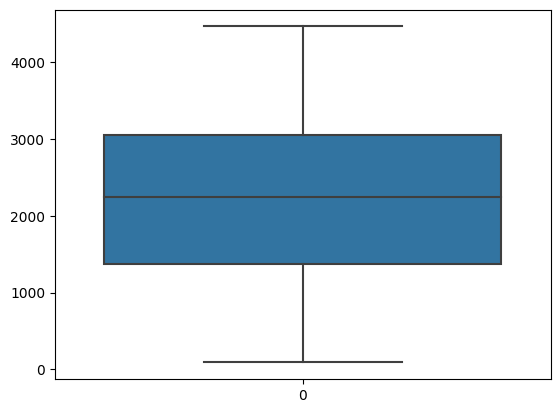

In [44]:
import seaborn as sns
sns.boxplot(df['Electricity_Bill'])

<Axes: >

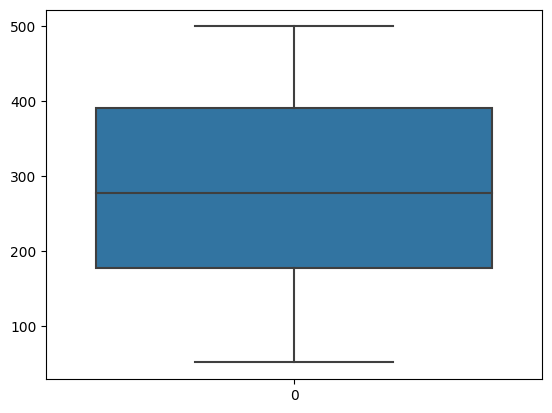

In [45]:
sns.boxplot(df['Units_Consumed'])

Up till now, the data seems fine with no duplicates values, missing values and outliers. So let's proceed to fitting simple linear regression on this data. 

<Axes: xlabel='Units_Consumed', ylabel='Electricity_Bill'>

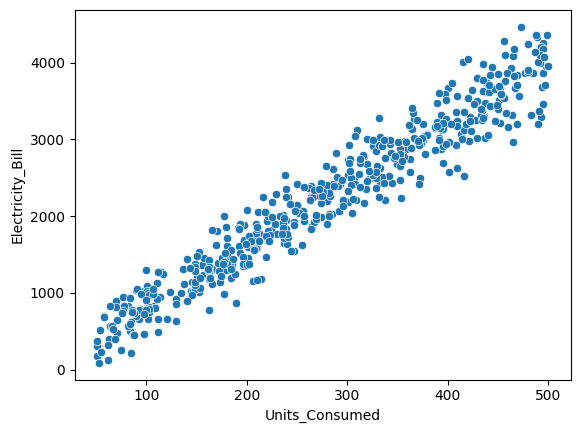

In [46]:

sns.scatterplot(x='Units_Consumed', y='Electricity_Bill', data=df)

Our data is sort of linear and now we are interested in predicting the electricity bill using simple linear regression model. We use Simple Linear Regression when we have only one input column and only one output column. 

In [47]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Electricity Bill')

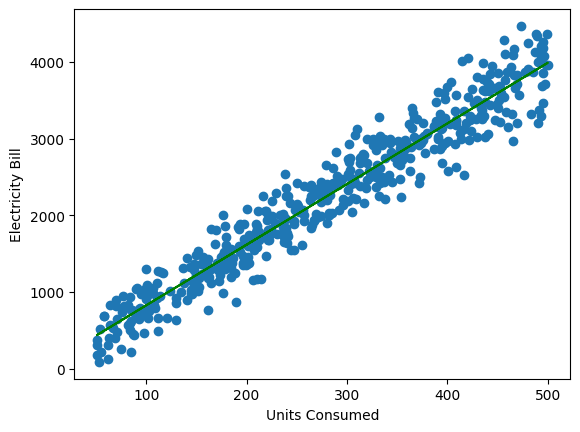

In [52]:
import matplotlib.pyplot as plt
plt.scatter(df['Units_Consumed'],df['Electricity_Bill'])
plt.plot(X_train,lr.predict(X_train),color = 'green')
plt.xlabel('Units Consumed')
plt.ylabel('Electricity Bill')

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [54]:
y_pred = lr.predict(X_test)

In [55]:
y_test.values

array([3248.64, 1551.86,  990.37, 3648.46, 2800.16,  224.07, 3861.19,
       1402.1 , 1332.96, 3321.59, 1672.03, 2550.57, 2251.6 , 2369.28,
       3710.  ,  765.06, 2589.72, 3736.72, 1590.87, 1971.22, 2469.73,
       2117.43, 1886.52, 1541.86, 1438.46, 2404.29, 1357.04, 3176.92,
       3251.37, 2465.49, 1930.45, 2922.95, 1245.19,  786.18, 2007.35,
        915.68, 3473.39, 3320.74, 2172.98, 1515.03, 2418.65, 3985.03,
        895.07, 1640.11, 3619.67, 3018.48, 2415.55, 3461.45, 3540.01,
       4048.21,  594.61, 1889.02, 1453.88, 1891.96, 3445.36,  719.89,
       2024.9 , 4204.59, 2577.8 , 2331.7 , 1746.41, 1304.5 , 2229.05,
       1147.34, 2989.52, 2429.84, 1445.07, 3119.71, 4252.67, 2800.43,
       1817.83, 3023.84, 2319.94, 3952.35, 4102.61, 1216.65, 2686.71,
       1148.36, 3432.77,  529.91, 1553.87, 3016.3 , 3311.11, 1312.13,
       1366.92, 2616.53, 3267.61, 3244.63, 1650.13, 3939.64, 3210.64,
       2252.57, 1375.32, 3355.47, 2818.49, 1576.59, 3202.08, 4102.62,
        736.94, 1810

In [56]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

Mean Absolute Error 184.2828132282765


Mean Absolute Error of 184.28 (in any assumed currency) represents the average absolute difference between the predicted and actual electricity bills. This indicates that, on average, the model’s predictions deviate from the actual values by around 184.28.

In [57]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))

Mean Squared Error 56912.69910566058


The Mean Squared Error of 56912.69 indicates the average squared difference between the predicted and actual electricity bills in squared currency units (currency²). While the value below Root Mean Squared Error represents the average deviation of predictions from actual values in the same unit as the electricity bill (currency).

In [58]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 238.5638260626715


In [59]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.9441484553669928


Since R2 score is close to 1, I will consider the model a good fit for the given data.

In [60]:
r2 = r2_score(y_test,y_pred)

In [61]:
X_test.shape

(100, 1)

In [62]:
#Adjusted R2 score
1-(((1-r2)*(100-1))/(100-1-1))

0.9435785416462478

There is no significant change in R2 score and adjusted R2 score.